In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis, normaltest
import requests
import json
from datetime import datetime, timedelta
import warnings
import os
import re

In [22]:
df = pd.read_csv('Air_Quality_Measures_on_the_National_Environmental_Health_Tracking_Network (1).csv')
df

,MeasureId,MeasureName,MeasureType,StratificationLevel,StateFips,StateName,CountyFips,CountyName,ReportYear,Value,Unit,UnitName,DataOrigin,MonitorOnly
0,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1027,Clay,1999,33.000000,No Units,No Units,Monitor Only,1
1,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1051,Elmore,1999,5.000000,No Units,No Units,Monitor Only,1
2,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1073,Jefferson,1999,39.000000,No Units,No Units,Monitor Only,1
3,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1079,Lawrence,1999,28.000000,No Units,No Units,Monitor Only,1
4,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1089,Madison,1999,31.000000,No Units,No Units,Monitor Only,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218630,296,Annual average ambient concentrations of PM 2....,Average,State x County,56,Wyoming,56045,Weston,2007,6.207126,µg/m³,Micograms per cubic meter,Monitor & Modeled,0
218631,296,Annual average ambient concentrations of PM 2....,Average,State x County,56,Wyoming,56045,Weston,2008,6.369764,µg/m³,Micograms per cubic meter,Monitor & Modeled,0
218632,296,Annual average ambient concentrations of PM 2....,Average,State x County,56,Wyoming,56045,Weston,2009,6.241708,µg/m³,Micograms per cubic meter,Monitor & Modeled,0
218633,296,Annual average ambient concentrations of PM 2....,Average,State x County,56,Wyoming,56045,Weston,2010,6.125957,µg/m³,Micograms per cubic meter,Monitor & Modeled,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218635 entries, 0 to 218634
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MeasureId            218635 non-null  int64  
 1   MeasureName          218635 non-null  object 
 2   MeasureType          218635 non-null  object 
 3   StratificationLevel  218635 non-null  object 
 4   StateFips            218635 non-null  int64  
 5   StateName            218635 non-null  object 
 6   CountyFips           218635 non-null  int64  
 7   CountyName           218635 non-null  object 
 8   ReportYear           218635 non-null  int64  
 9   Value                218635 non-null  float64
 10  Unit                 218635 non-null  object 
 11  UnitName             218635 non-null  object 
 12  DataOrigin           218635 non-null  object 
 13  MonitorOnly          218635 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 23.4+ MB


In [23]:
cleaned_df = df.copy()
# Create a copy for cleaning

In [ ]:
# Handle Missing Values
print("HANDLING MISSING VALUES")
cleaned_df.replace('Not Available', np.nan, inplace=True)
cleaned_df.replace('Missing', np.nan, inplace=True)
cleaned_df.replace('NA', np.nan, inplace=True)
cleaned_df.replace(' ', np.nan, inplace=True)

cleaned_df.isnull().sum()
# we don't have any missing values in the target column

HANDLING MISSING VALUES


MeasureId              0
MeasureName            0
MeasureType            0
StratificationLevel    0
StateFips              0
StateName              0
CountyFips             0
CountyName             0
ReportYear             0
Value                  0
Unit                   0
UnitName               0
DataOrigin             0
MonitorOnly            0
dtype: int64

In [ ]:
cleaned_df.duplicated().sum()
#We don't have any duplicate rows

np.int64(0)

In [30]:
if 'MeasureName' in df.columns:
    print("1. MULTIPLE MEASURES DETECTED:")
    measures = df['MeasureName'].unique()
    for measure in measures:
        count = len(df[df['MeasureName'] == measure])
        print(f"   • {measure}: {count} records")
    print()

1. MULTIPLE MEASURES DETECTED:
   • Number of days with maximum 8-hour average ozone concentration over the National Ambient Air Quality Standard: 10341 records
   • Percent of days with PM2.5 levels over the National Ambient Air Quality Standard (NAAQS): 9268 records
   • Person-days with PM2.5 over the National Ambient Air Quality Standard: 9268 records
   • Number of person-days with maximum 8-hour average ozone concentration over the National Ambient Air Quality Standard: 10341 records
   • Annual average ambient concentrations of PM2.5 in micrograms per cubic meter (based on seasonal averages and daily measurement): 8422 records
   • Number of days with maximum 8-hour average ozone concentration over the National Ambient Air Quality Standard (monitor and modeled data): 34199 records
   • Number of person-days with maximum 8-hour average ozone concentration over the National Ambient Air Quality Standard (monitor and modeled data): 34199 records
   • Percent of days with PM2.5 level

In [31]:
if 'UnitName' in df.columns:
    print("2. INCONSISTENT UNITS:")
    units = df['UnitName'].unique()
    for unit in units:
        count = len(df[df['UnitName'] == unit])
        print(f"   • {unit}: {count} records")
    print()

2. INCONSISTENT UNITS:
   • No Units: 132547 records
   • Percent: 43467 records
   • Micograms per cubic meter: 42621 records



In [43]:
df.groupby(['Unit', 'MeasureName'])['MeasureId'].nunique()

Unit      MeasureName                                                                                                                                               
%         Percent of days with PM2.5 levels over the National Ambient Air Quality Standard (NAAQS)                                                                      1
          Percent of days with PM2.5 levels over the National Ambient Air Quality Standard (monitor and modeled data)                                                   1
No Units  Number of days with maximum 8-hour average ozone concentration over the National Ambient Air Quality Standard                                                 1
          Number of days with maximum 8-hour average ozone concentration over the National Ambient Air Quality Standard (monitor and modeled data)                      1
          Number of person-days with PM2.5 over the National Ambient Air Quality Standard (monitor and modeled data)                                       

In [32]:
if 'DataOrigin' in df.columns:
    print("3. DATA ORIGIN VARIATION:")
    origins = df['DataOrigin'].unique()
    for origin in origins:
        count = len(df[df['DataOrigin'] == origin])
        print(f"   • {origin}: {count} records")
    print()

3. DATA ORIGIN VARIATION:
   • Monitor Only: 83945 records
   • Monitor & Modeled: 134690 records



In [33]:
if 'MeasureType' in df.columns:
    print("4. MEASURE TYPE VARIATION:")
    measure_types = df['MeasureType'].unique()
    for mtype in measure_types:
        count = len(df[df['MeasureType'] == mtype])
        print(f"   • {mtype}: {count} records")
    print()

4. MEASURE TYPE VARIATION:
   • Counts: 132547 records
   • Percent: 43467 records
   • Average: 42621 records



In [37]:
unique_states = df['StateName'].nunique()

unique_counties = df['CountyName'].nunique()
print(f"5. GEOGRAPHIC COVERAGE: {unique_states} unique states and {unique_counties} unique counties represented.")

5. GEOGRAPHIC COVERAGE: 51 unique states and 1816 unique counties represented.


In [30]:
numeric_cols = cleaned_df.select_dtypes(include=[np.number])

# Compute summary statistics
summary_stats = numeric_cols.describe().T  # includes count, mean, std, min, quartiles, max
summary_stats['variance'] = numeric_cols.var()
summary_stats['skewness'] = numeric_cols.apply(skew)
summary_stats['kurtosis'] = numeric_cols.apply(kurtosis)

print("\n=== Basic Summary Statistics ===")
print(summary_stats.round(3))


=== Basic Summary Statistics ===
                count        mean           std     min      25%      50%  \
MeasureId    218635.0     248.437  8.633300e+01    83.0    292.0    293.0   
StateFips    218635.0      30.229  1.513900e+01     1.0     18.0     29.0   
CountyFips   218635.0   30328.040  1.515717e+04  1001.0  18146.0  29189.0   
ReportYear   218635.0    2005.998  3.432000e+00  1999.0   2003.0   2006.0   
Value        218635.0  649964.912  1.160826e+07     0.0      0.0      2.0   
MonitorOnly  218635.0       0.384  4.860000e-01     0.0      0.0      0.0   

                   75%           max      variance  skewness  kurtosis  
MeasureId      295.000  2.960000e+02  7.453408e+03    -1.366    -0.132  
StateFips       45.000  5.600000e+01  2.292000e+02    -0.076    -1.107  
CountyFips   45021.000  5.604500e+04  2.297399e+08    -0.074    -1.106  
ReportYear    2009.000  2.013000e+03  1.178000e+01     0.008    -1.062  
Value           13.941  1.084153e+09  1.347518e+14    58.650 


=== Correlation Matrix ===
             MeasureId  StateFips  CountyFips  ReportYear  Value  MonitorOnly
MeasureId        1.000      0.043       0.044       0.001 -0.045       -0.669
StateFips        0.043      1.000       1.000      -0.000 -0.039       -0.061
CountyFips       0.044      1.000       1.000      -0.000 -0.040       -0.062
ReportYear       0.001     -0.000      -0.000       1.000 -0.023       -0.007
Value           -0.045     -0.039      -0.040      -0.023  1.000        0.065
MonitorOnly     -0.669     -0.061      -0.062      -0.007  0.065        1.000


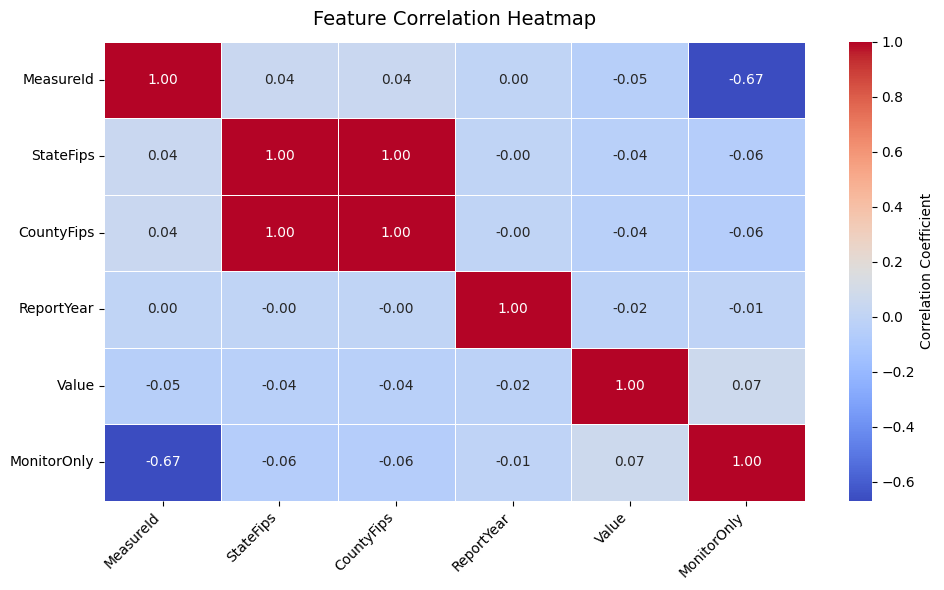

In [ ]:
corr_matrix = numeric_cols.corr()

print("\n=== Correlation Matrix ===")
print(corr_matrix.round(3))

# --- Plot correlation heatmap using seaborn ---
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix,
    annot=True,              # show numeric correlation values
    fmt=".2f",               # 2 decimal places
    cmap="coolwarm",         # color palette
    linewidths=0.5,          # lines between cells
    cbar_kws={"label": "Correlation Coefficient"}
)

plt.title("Feature Correlation Heatmap", fontsize=14, pad=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [37]:
# Since statefips and countyfips extacly similar and has high correlation of 1 we can drop one of them
cleaned_df.drop(columns=['StateFips'], inplace=True)

In [31]:
year_range = (df['ReportYear'].min(), df['ReportYear'].max())

year_range

(np.int64(1999), np.int64(2013))

In [70]:
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data within bounds
df_no_outliers = df[(df['Value'] >= lower_bound) & (df['Value'] <= upper_bound)]

# Show results
print(f"Original dataset size: {len(df)}")
print(f"After removing outliers: {len(df_no_outliers)}")
print(f"Removed {len(df) - len(df_no_outliers)} outliers")

# Save the cleaned dataset
df_no_outliers.to_csv("air_quality_no_outliers.csv", index=False)
print("Cleaned dataset saved as 'air_quality_no_outliers.csv'")

Original dataset size: 218635
After removing outliers: 173586
Removed 45049 outliers
Cleaned dataset saved as 'air_quality_no_outliers.csv'


In [9]:
# FEATURE ENGINEERING"

region_mapping = {
    'Alabama': 'Southeast', 'Georgia': 'Southeast', 'Florida': 'Southeast',
    'North Carolina': 'Southeast', 'South Carolina': 'Southeast',
    'Louisiana': 'South', 'Texas': 'South', 'Arkansas': 'South',
    'California': 'West', 'Nevada': 'West', 'Arizona': 'West',
    'New York': 'Northeast', 'Pennsylvania': 'Northeast',
    'Illinois': 'Midwest', 'Ohio': 'Midwest', 'Michigan': 'Midwest'
}
cleaned_df['region'] = cleaned_df['StateName'].map(region_mapping).fillna('Other')

print("Added features: region\n")

Added features: region



In [24]:
print("1. MEASURE HIERARCHY & RELATIONSHIPS:\n")

# Create a measure mapping to consolidate similar measures
measure_mapping = {
    'Number of days with maximum 8-hour average ozone concentration over the National Ambient Air Quality Standard': 'Ozone_Days_Monitor',
    'Number of days with maximum 8-hour average ozone concentration over the National Ambient Air Quality Standard (monitor and modeled data)': 'Ozone_Days_Combined',
    'Number of person-days with maximum 8-hour average ozone concentration over the National Ambient Air Quality Standard': 'Ozone_PersonDays_Monitor',
    'Number of person-days with maximum 8-hour average ozone concentration over the National Ambient Air Quality Standard (monitor and modeled data)': 'Ozone_PersonDays_Combined',
    'Percent of days with PM2.5 levels over the National Ambient Air Quality Standard (NAAQS)': 'PM25_Percent_Monitor',
    'Percent of days with PM2.5 levels over the National Ambient Air Quality Standard (monitor and modeled data)': 'PM25_Percent_Combined',
    'Person-days with PM2.5 over the National Ambient Air Quality Standard': 'PM25_PersonDays_Monitor',
    'Number of person-days with PM2.5 over the National Ambient Air Quality Standard (monitor and modeled data)': 'PM25_PersonDays_Combined',
    'Annual average ambient concentrations of PM2.5 in micrograms per cubic meter (based on seasonal averages and daily measurement)': 'PM25_Concentration_Monitor',
    'Annual average ambient concentrations of soluPM 2.5 in micrograms per cubic meter, based on seasonal averages and daily measurement (monitor and modeled data)': 'PM25_Concentration_Combined'
}

measure_categories = {
    'Ozone': ['Ozone_Days_Monitor', 'Ozone_Days_Combined', 'Ozone_PersonDays_Monitor', 'Ozone_PersonDays_Combined'],
    'PM2.5': ['PM25_Percent_Monitor', 'PM25_Percent_Combined', 'PM25_PersonDays_Monitor', 'PM25_PersonDays_Combined', 'PM25_Concentration_Monitor', 'PM25_Concentration_Combined']
}

# Map measures
cleaned_df['MeasureKey'] = cleaned_df['MeasureName'].map(measure_mapping)

print("Measure Consolidation Mapping:")
for i, (original, key) in enumerate(measure_mapping.items(), 1):
    count = len(cleaned_df[cleaned_df['MeasureName'] == original])
    print(f"{i:2d}. {key:30s} ← {count:5d} records")
    print(f"    Original: {original[:70]}")
    if count > 0:
        data_origin = cleaned_df[cleaned_df['MeasureName'] == original]['DataOrigin'].unique()
        unit = cleaned_df[cleaned_df['MeasureName'] == original]['UnitName'].unique()
        print(f"    Data Origin: {data_origin} | Unit: {unit}")
    print()


1. MEASURE HIERARCHY & RELATIONSHIPS:

Measure Consolidation Mapping:
 1. Ozone_Days_Monitor             ← 10341 records
    Original: Number of days with maximum 8-hour average ozone concentration over th
    Data Origin: ['Monitor Only'] | Unit: ['No Units']

 2. Ozone_Days_Combined            ← 34199 records
    Original: Number of days with maximum 8-hour average ozone concentration over th
    Data Origin: ['Monitor & Modeled' 'Monitor Only'] | Unit: ['No Units']

 3. Ozone_PersonDays_Monitor       ← 10341 records
    Original: Number of person-days with maximum 8-hour average ozone concentration 
    Data Origin: ['Monitor Only'] | Unit: ['No Units']

 4. Ozone_PersonDays_Combined      ← 34199 records
    Original: Number of person-days with maximum 8-hour average ozone concentration 
    Data Origin: ['Monitor & Modeled' 'Monitor Only'] | Unit: ['No Units']

 5. PM25_Percent_Monitor           ←  9268 records
    Original: Percent of days with PM2.5 levels over the National Ambie

In [25]:
# Since we have a numerical id and also we have  MeasureKey we don't need the original MeasureName column anymore 
cleaned_df.drop(columns=['MeasureName'], inplace=True)


In [26]:
cleaned_df

,MeasureId,MeasureType,StratificationLevel,StateFips,StateName,CountyFips,CountyName,ReportYear,Value,Unit,UnitName,DataOrigin,MonitorOnly,MeasureKey
0,83,Counts,State x County,1,Alabama,1027,Clay,1999,33.000000,No Units,No Units,Monitor Only,1,Ozone_Days_Monitor
1,83,Counts,State x County,1,Alabama,1051,Elmore,1999,5.000000,No Units,No Units,Monitor Only,1,Ozone_Days_Monitor
2,83,Counts,State x County,1,Alabama,1073,Jefferson,1999,39.000000,No Units,No Units,Monitor Only,1,Ozone_Days_Monitor
3,83,Counts,State x County,1,Alabama,1079,Lawrence,1999,28.000000,No Units,No Units,Monitor Only,1,Ozone_Days_Monitor
4,83,Counts,State x County,1,Alabama,1089,Madison,1999,31.000000,No Units,No Units,Monitor Only,1,Ozone_Days_Monitor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218630,296,Average,State x County,56,Wyoming,56045,Weston,2007,6.207126,µg/m³,Micograms per cubic meter,Monitor & Modeled,0,NaN
218631,296,Average,State x County,56,Wyoming,56045,Weston,2008,6.369764,µg/m³,Micograms per cubic meter,Monitor & Modeled,0,NaN
218632,296,Average,State x County,56,Wyoming,56045,Weston,2009,6.241708,µg/m³,Micograms per cubic meter,Monitor & Modeled,0,NaN
218633,296,Average,State x County,56,Wyoming,56045,Weston,2010,6.125957,µg/m³,Micograms per cubic meter,Monitor & Modeled,0,NaN


In [28]:
df.columns = [c.strip() for c in df.columns]

# --- Create output directory ---
output_dir = "separated_measures"
os.makedirs(output_dir, exist_ok=True)

# Group by MeasureKey instead of MeasureName
for measure_key, group in cleaned_df.groupby('MeasureKey'):
    if pd.isna(measure_key):  # skip missing keys
        continue

    safe_name = re.sub(r'[^a-zA-Z0-9_]', '_', measure_key.lower())
    safe_name = re.sub(r'_+', '_', safe_name).strip('_')

    file_path = os.path.join(output_dir, f"{safe_name}.csv")
    group.to_csv(file_path, index=False)

    print(f"Saved {file_path} ({len(group)} records)")

print(f"\nAll measurement types have been separated into '{output_dir}/'")


# The dataset was separated by "MeasureName" because it contains multiple air quality indicators 
# (e.g., ozone days, PM2.5 concentration, percent of days over standards, person-days exposure, etc.)
# — each with different units, scales, and meanings.
# 
# Combining them in a single file causes inconsistent units (Percent, µg/m³, No Units),
# making analysis unreliable. By separating them:
#   • Each CSV file now represents a single, consistent measurement type.
#   • Each subset can be analyzed independently or merged later if needed.
#   • This avoids data contamination and preserves measurement integrity.
#
# Example output files:
#   - number_of_days_with_maximum_8_hour_average_ozone_concentration_over_the_naaqs.csv
#   - percent_of_days_with_pm25_levels_over_the_naaqs.csv
#   - annual_average_ambient_concentrations_of_pm25_in_micrograms_per_cubic_meter.csv
#

Saved separated_measures\ozone_days_combined.csv (34199 records)
Saved separated_measures\ozone_days_monitor.csv (10341 records)
Saved separated_measures\ozone_persondays_combined.csv (34199 records)
Saved separated_measures\ozone_persondays_monitor.csv (10341 records)
Saved separated_measures\pm25_concentration_monitor.csv (8422 records)
Saved separated_measures\pm25_percent_combined.csv (34199 records)
Saved separated_measures\pm25_percent_monitor.csv (9268 records)
Saved separated_measures\pm25_persondays_combined.csv (34199 records)
Saved separated_measures\pm25_persondays_monitor.csv (9268 records)

All measurement types have been separated into 'separated_measures/'


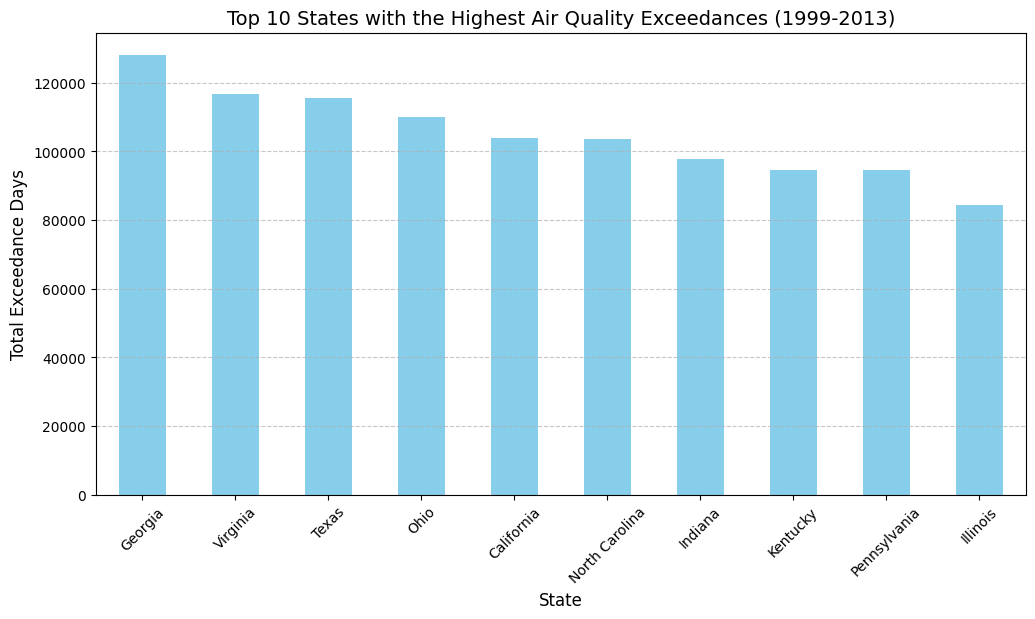

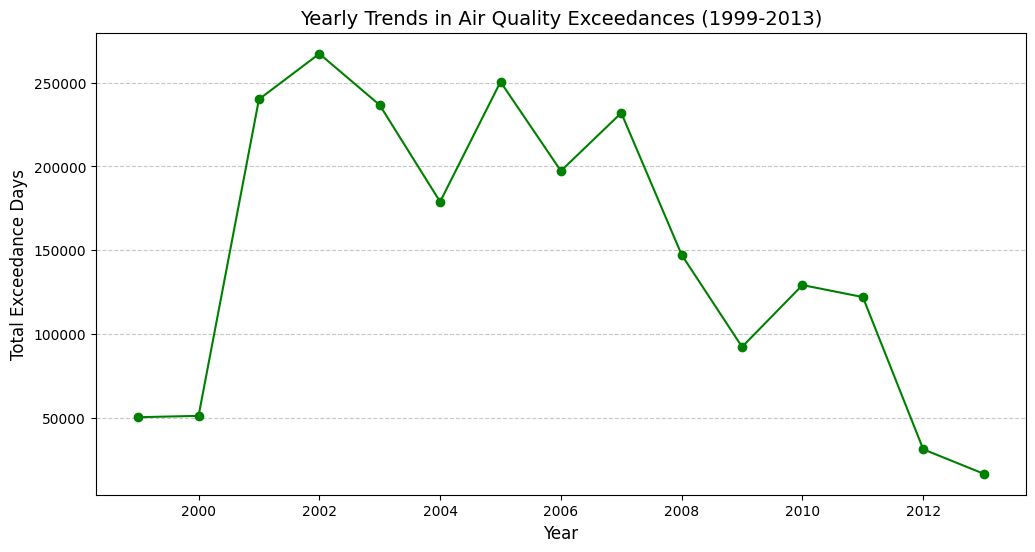

In [42]:
# Aggregate data by state for geographical distribution

state_aggregate = cleaned_df.groupby('StateName')['Value'].sum().sort_values(ascending=False)

# Temporal trend: Aggregate by year

yearly_trend = cleaned_df.groupby('ReportYear')['Value'].sum()


# Plot: Exceedances by state (Top 10 states)

plt.figure(figsize=(12, 6))
state_aggregate.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 States with the Highest Air Quality Exceedances (1999-2013)", fontsize=14)
plt.ylabel("Total Exceedance Days", fontsize=12)
plt.xlabel("State", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



# Plot: Temporal trend

plt.figure(figsize=(12, 6))
yearly_trend.plot(color='green', marker='o')
plt.title("Yearly Trends in Air Quality Exceedances (1999-2013)", fontsize=14)
plt.ylabel("Total Exceedance Days", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

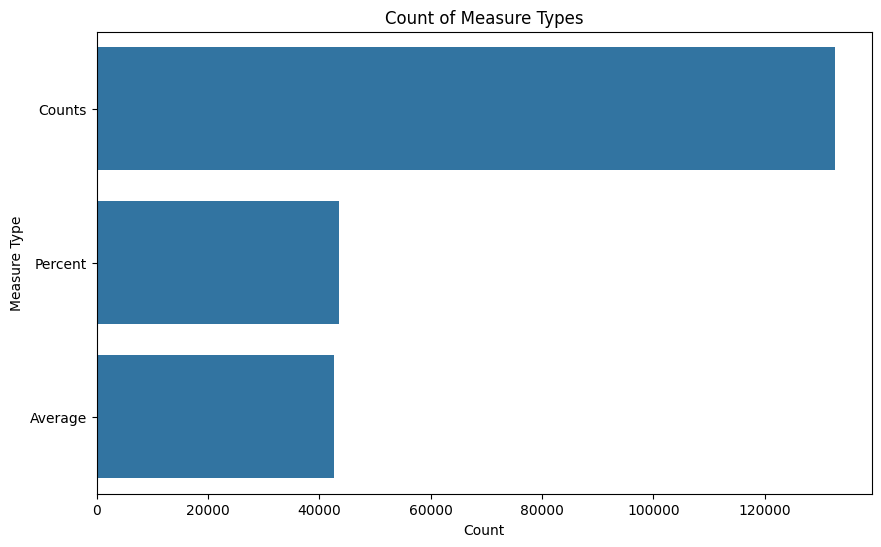

In [52]:
# Bar plot
plt.figure(figsize=(10, 6))
sns.countplot(y='MeasureType', data=df, order=df['MeasureType'].value_counts().index)
plt.title('Count of Measure Types')
plt.xlabel('Count')
plt.ylabel('Measure Type')
plt.show()

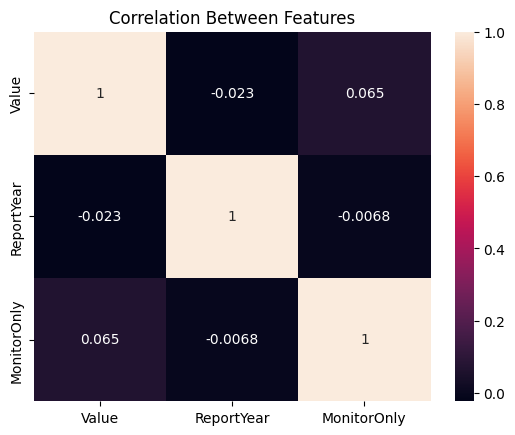

In [56]:

sns.heatmap(df[['Value', 'ReportYear', 'MonitorOnly']].corr(), annot=True)
plt.title('Correlation Between Features')
plt.show()

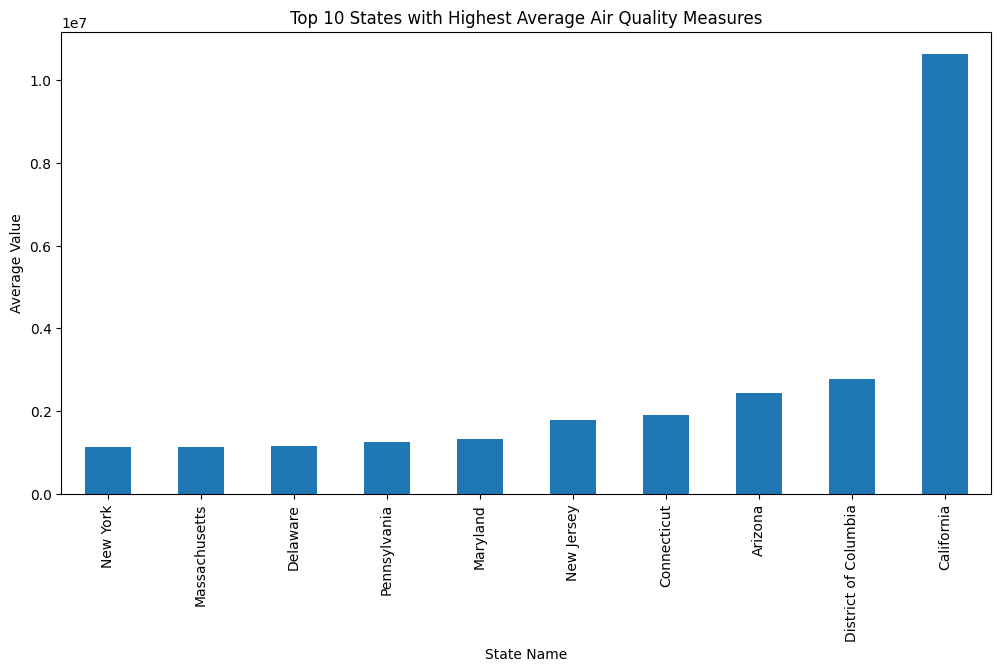

In [58]:
state_means = df.groupby('StateName')['Value'].mean().sort_values()

plt.figure(figsize=(12, 6))
state_means[-10:].plot(kind='bar')
plt.title('Top 10 States with Highest Average Air Quality Measures')
plt.ylabel('Average Value')
plt.xlabel('State Name')
plt.show()

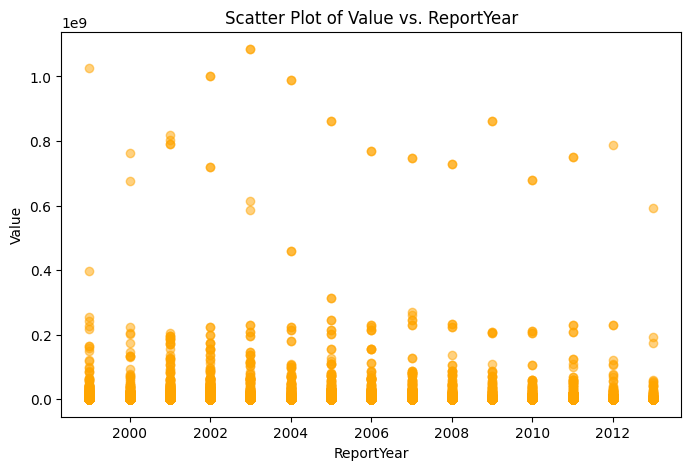

In [60]:
plt.figure(figsize=(8, 5))
plt.scatter(df['ReportYear'], df['Value'], alpha=0.5, color='orange')
plt.title('Scatter Plot of Value vs. ReportYear')
plt.xlabel('ReportYear')
plt.ylabel('Value')
plt.show()

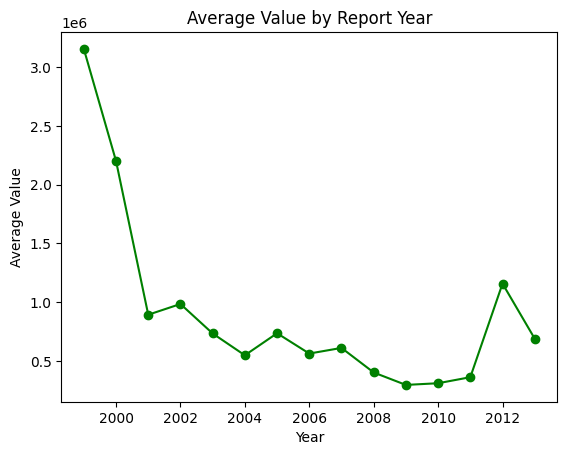

In [61]:
yearly_avg = df.groupby('ReportYear')['Value'].mean()

plt.plot(yearly_avg.index, yearly_avg.values, marker='o', linestyle='-', color='green')
plt.title('Average Value by Report Year')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.show()

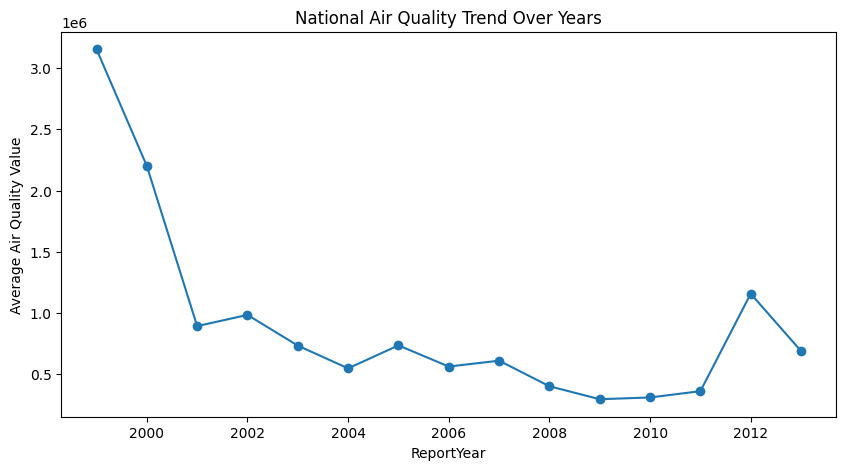

In [62]:
yearly_trend = df.groupby('ReportYear')['Value'].mean()
yearly_trend.plot(kind='line', marker='o', figsize=(10,5), title='National Air Quality Trend Over Years')
plt.ylabel('Average Air Quality Value')
plt.show()

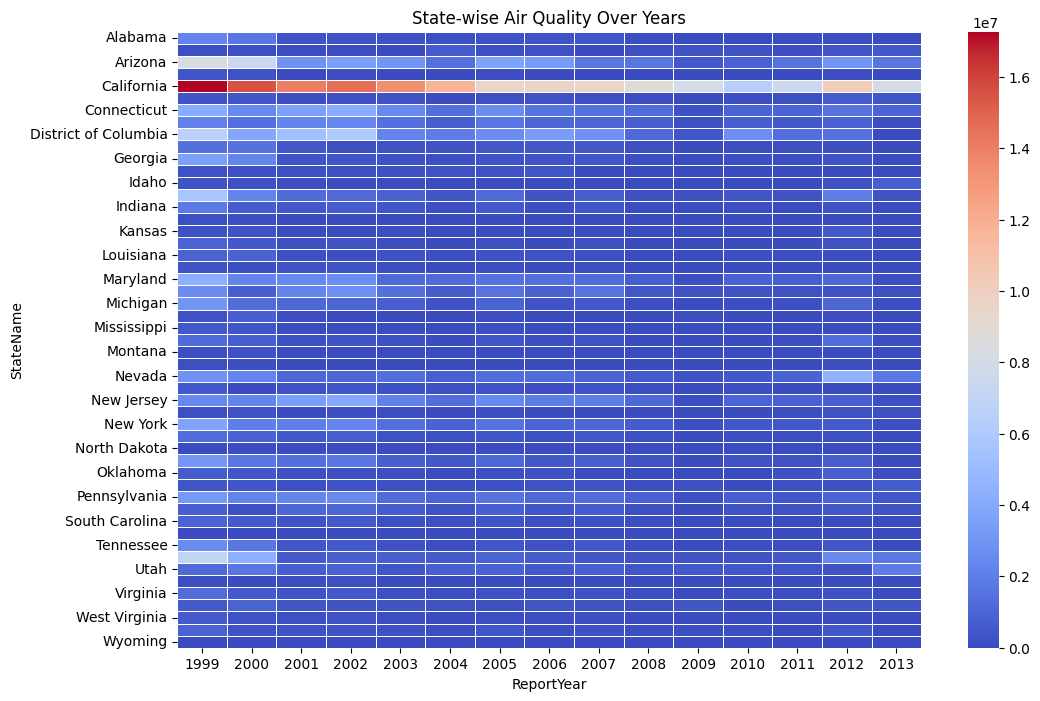

In [66]:
pivot = df.pivot_table(values='Value', index='StateName', columns='ReportYear', aggfunc='mean')
plt.figure(figsize=(12,8))
sns.heatmap(pivot, cmap='coolwarm', linewidths=0.5)
plt.title('State-wise Air Quality Over Years')
plt.show()

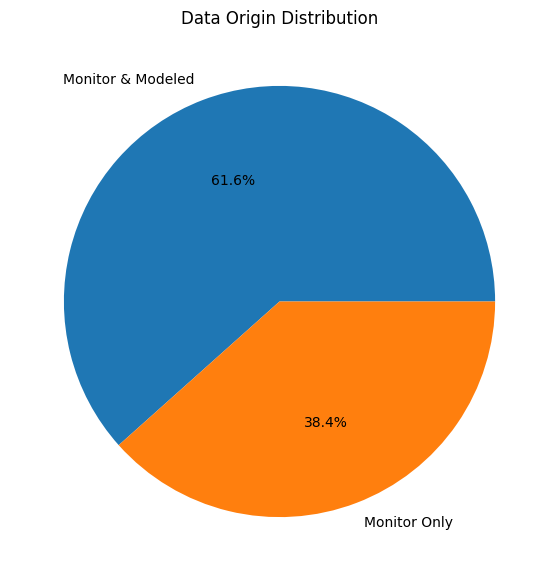

In [67]:
origin_counts = df['DataOrigin'].value_counts()
origin_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(7,7), title='Data Origin Distribution')
plt.ylabel('')
plt.show()

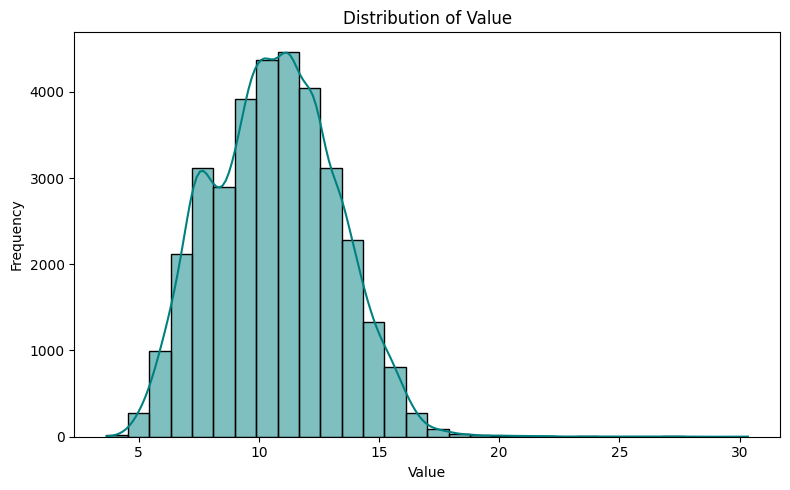

In [40]:
df_dif_tart = pd.read_csv('separated_measures/annual_average_ambient_concentrations_of_pm_2_5_in_micrograms_per_cubic_meter_based_on_seasonal_averages_and_daily_measurement_monitor_and_modeled_data.csv')

plt.figure(figsize=(8, 5))
sns.histplot(df_dif_tart['Value'], kde=True, bins=30, color='teal')
plt.title('Distribution of Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# we very little data is skewd or has kurtosis issues so we do a log transformation 
df_dif_tart['LogValue'] = np.log1p(df_dif_tart['Value'])

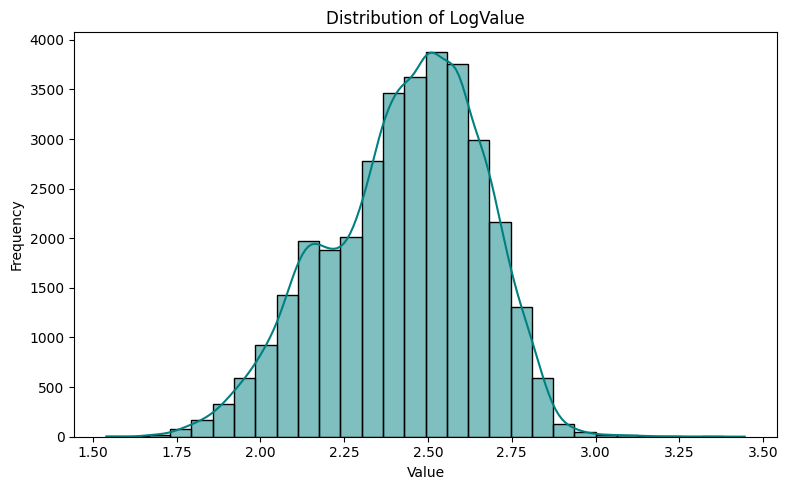

In [42]:
plt.figure(figsize=(8, 5))
sns.histplot(df_dif_tart['LogValue'], kde=True, bins=30, color='teal')
plt.title('Distribution of LogValue')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

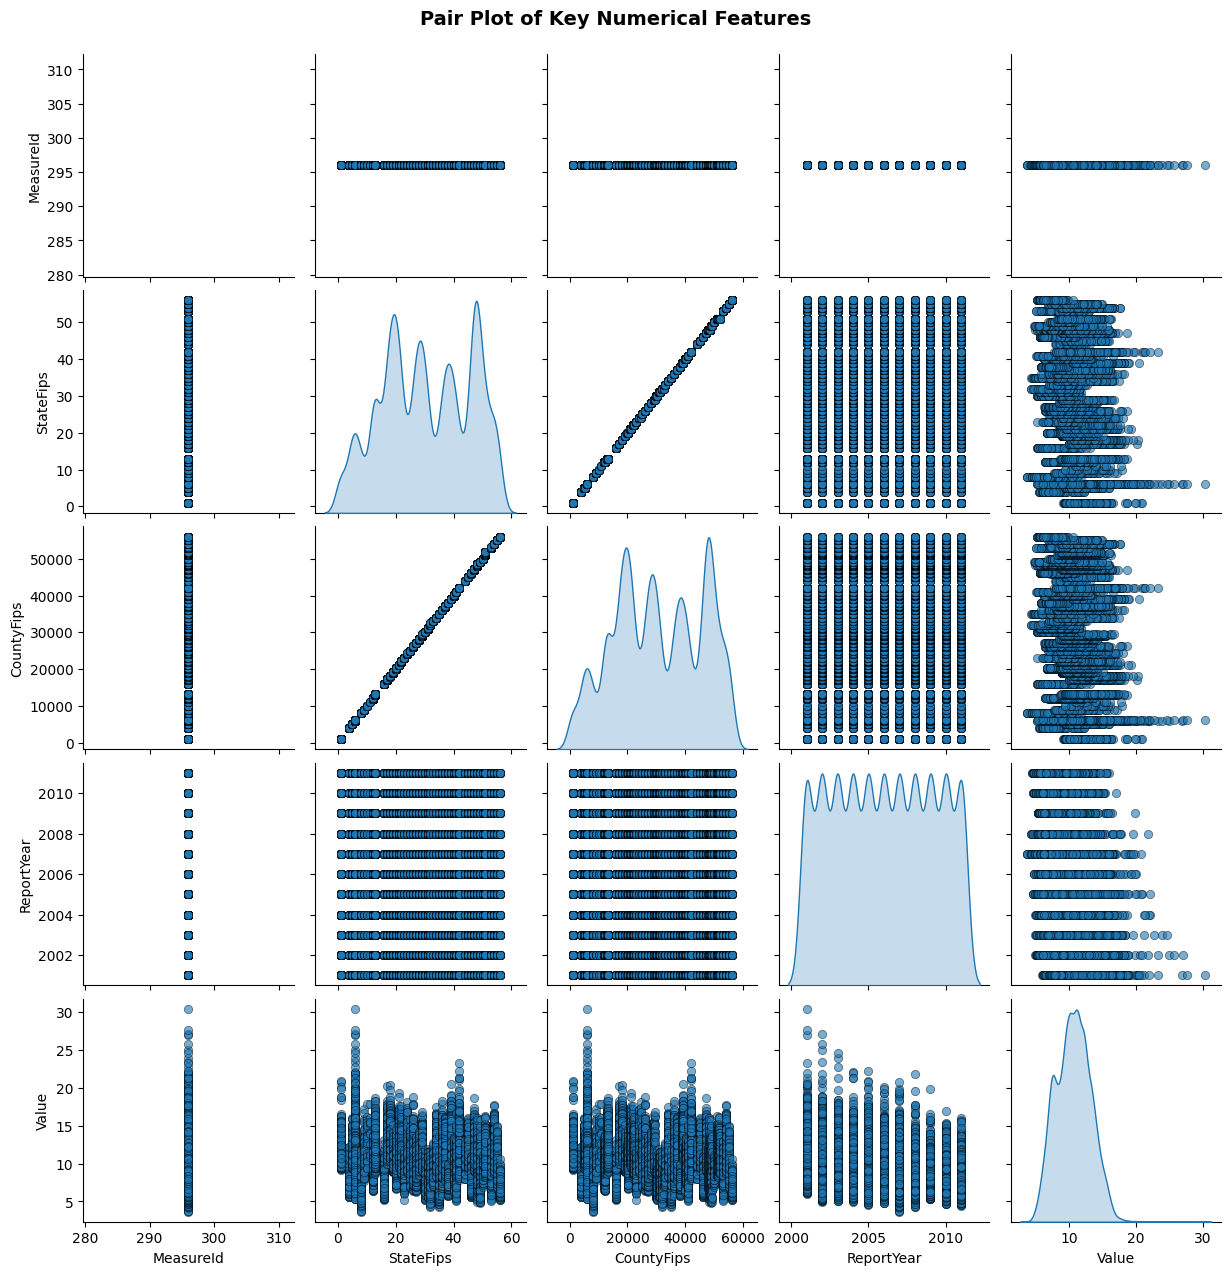

In [85]:
num_cols = ['MeasureId', 'StateFips', 'CountyFips', 'ReportYear', 'Value']

# Create the pair plot
sns.pairplot(df_dif_tart[num_cols], diag_kind='kde', plot_kws={'alpha':0.6, 'edgecolor':'black'})

plt.suptitle('Pair Plot of Key Numerical Features', fontsize=14, fontweight='bold', y=1.02)
plt.show()

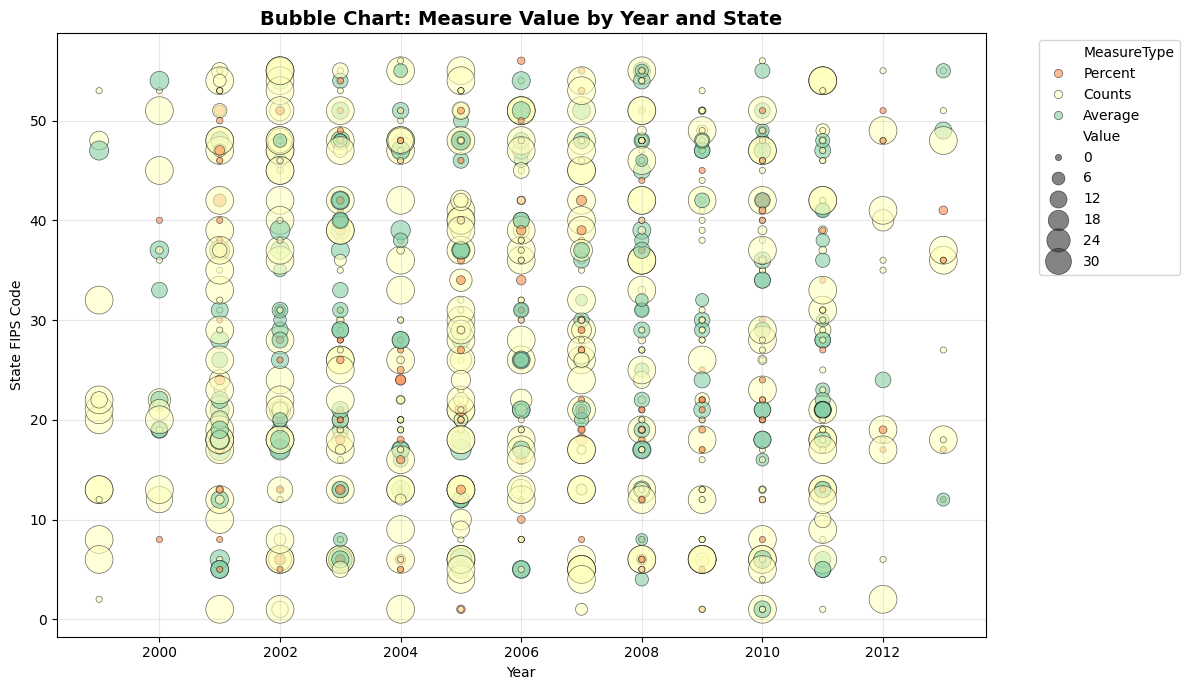

In [86]:
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=cleaned_df.sample(1000, random_state=42),  # sample to keep it readable
    x='ReportYear', y='StateFips',
    size='Value', hue='MeasureType',
    alpha=0.6, sizes=(20, 400), edgecolor='black', linewidth=0.5, palette='Spectral'
)

plt.title('Bubble Chart: Measure Value by Year and State', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('State FIPS Code')
plt.grid(alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

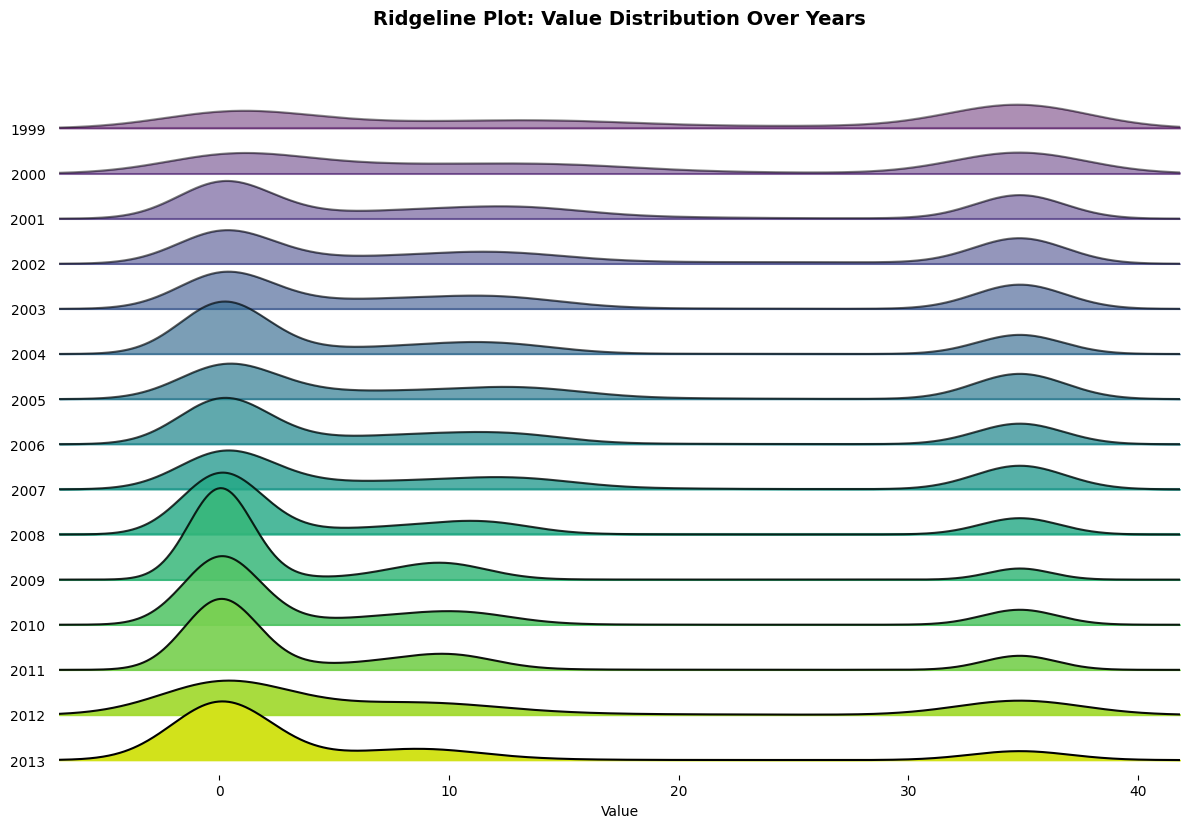

In [89]:
import joypy

plt.figure(figsize=(12, 8))
joypy.joyplot(cleaned_df, by='ReportYear', column='Value', colormap=plt.cm.viridis, fade=True, figsize=(12,8))
plt.title('Ridgeline Plot: Value Distribution Over Years', fontsize=14, fontweight='bold')
plt.xlabel('Value')
plt.show()

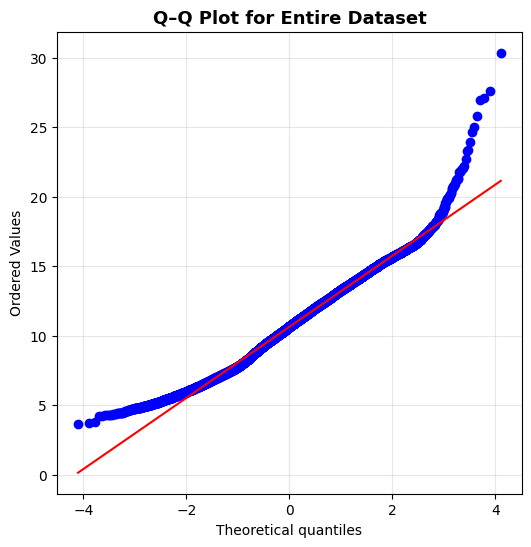

In [80]:
plt.figure(figsize=(6,6))
stats.probplot(df_dif_tart['Value'], dist="norm", plot=plt)
plt.title("Q–Q Plot for Entire Dataset", fontsize=13, fontweight='bold')
plt.grid(alpha=0.3)
plt.show()